In [13]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import numpy as np
from os import listdir
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from random import sample
from os.path import join
from scipy import spatial
from sklearn.externals import joblib

In [3]:
model = VGG16(weights='imagenet', include_top=False)

In [15]:
#Get images from individual footwear folder and input in the model and get output from the last layer . 

def get_vec_footwear(footwear_dir):
    
    resnet50_feature_list = []
    filenames = listdir(footwear_dir)
    for i,fname in enumerate(filenames):
        try :
            img = image.load_img(footwear_dir+'/'+fname,target_size=(224,224))
#             img = image.load_img(footwear_dir+'/'+fname)
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data,axis=0)
            img_data = preprocess_input(img_data)
            resnet50_feature = model_res.predict(img_data)
            resnet50_feature_np = np.array(resnet50_feature)
            resnet50_feature_list.append(resnet50_feature_np.flatten())
            
        except IOError :
            continue
            
    resnet50_feature_list_np = np.array(resnet50_feature_list)
    return resnet50_feature_list_np


In [5]:
vgg16_feature_list_np = get_vec_footwear('C:/Users/sures/Desktop/Fynd-Internshp/Problem-1/lace_data_rgb/')
vgg16_feature_list_np.shape

(2260, 25088)

In [6]:
#Apply kmeans on resnet vector to get clusters
    
def get_clusters(a,b,resnet50_feature_list_np):
    silloute_score = []
    objects = []
    cluster_errors = []
    for i in range(a,b):
        objects.append(i) 
        print(i)
        kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1).fit(resnet50_feature_list_np)
        silloute_score.append(metrics.silhouette_score(resnet50_feature_list_np , kmeans.labels_,metric='euclidean'))
        cluster_errors.append( kmeans.inertia_ )
        
    return silloute_score , objects , cluster_errors

In [8]:
silloute_score_vgg , objects_vgg , cluster_errors_vgg = get_clusters(2,10,vgg16_feature_list_np)

2
3
4
5
6
7
8
9


In [11]:
#finding optimal cluster number using silloute score 

def plot_silloute(silloute_score , objects) :
    
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, silloute_score, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Silloute Score')
    plt.title('No of Clusters')

    plt.show()

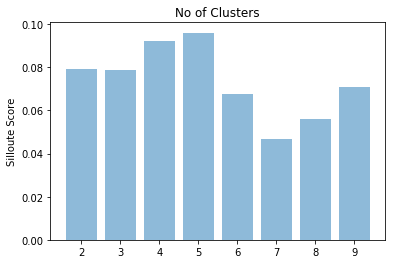

In [12]:
plot_silloute(silloute_score_vgg , objects_vgg)

In [14]:
model_res = ResNet50(weights='imagenet', include_top=False)

C:\Users\sures\Anaconda3\lib\site-packages\keras_applications\resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [16]:
resnet_feature_list_np = get_vec_footwear('C:/Users/sures/Desktop/Fynd-Internshp/Problem-1/lace_data_rgb/')
resnet_feature_list_np.shape

(2260, 100352)

In [17]:
silloute_score_resnet , objects_resnet , cluster_errors_vgg = get_clusters(2,10,resnet_feature_list_np)

2
3
4
5
6
7
8
9


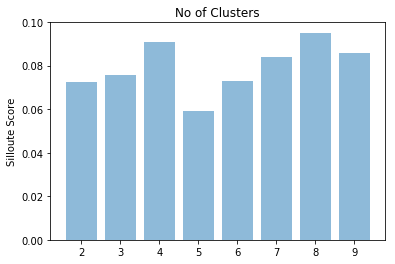

In [18]:
plot_silloute(silloute_score_resnet , objects_resnet)

In [33]:
def plot_silloute_multiple(silloute_score_vgg , objects_vgg,silloute_score_resnet,objects_resnet) :
    
    y_pos = np.arange(len(objects_resnet))
    p1 = plt.bar(y_pos+0, silloute_score_vgg, color = 'b', width = 0.25)
    p2 = plt.bar(y_pos+0.25, silloute_score_resnet, color = 'r', width = 0.25)
    plt.xticks(y_pos, objects_vgg)
    plt.ylabel('Silloute Score')
    plt.title('No of Clusters')
    plt.legend((p1[0], p2[0]), ('VGG16', 'ResNet50'))
    plt.show()

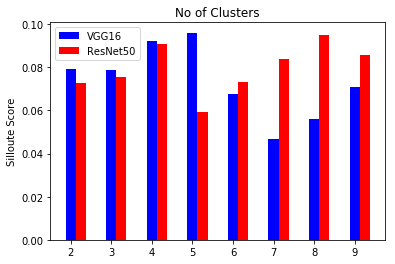

In [34]:
plot_silloute_multiple(silloute_score_vgg,objects_vgg,silloute_score_resnet , objects_resnet)

In [35]:
silloute_score_vgg , objects_vgg , cluster_errors_vgg = get_clusters(10,18,vgg16_feature_list_np)

10
11
12
13
14
15
16
17


In [36]:
silloute_score_resnet , objects_resnet , cluster_errors_vgg = get_clusters(10,18,resnet_feature_list_np)

10
11
12
13
14
15
16
17


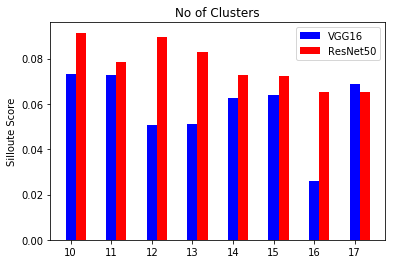

In [37]:
plot_silloute_multiple(silloute_score_vgg,objects_vgg,silloute_score_resnet , objects_resnet)